In [1]:
import pdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
import pickle as pkl
import glob
import xesmf as xe

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [2]:
cp4_path = '/home/users/cornkle/linked_CP4/hist/'

In [3]:
date = '20060827'

In [4]:
q = xr.open_dataset(glob.glob(cp4_path+'q_pl/*_'+date+'*.nc')[0])  # 'f30205

In [5]:
u = xr.open_dataset(glob.glob(cp4_path+'u_pl/*_'+date+'*.nc')[0])  #  f30201

In [6]:
v = xr.open_dataset(glob.glob(cp4_path+'v_pl/*_'+date+'*.nc')[0])  # f30202

In [7]:
t = xr.open_dataset(glob.glob(cp4_path+'t_pl/*_'+date+'*.nc')[0])  # f30204

In [8]:
olr = xr.open_dataset(glob.glob(cp4_path+'lw_out_PBLtop/*_'+date+'*.nc')[0]) # a03332

In [9]:
omega = xr.open_dataset(glob.glob(cp4_path+'omega_pl/*_'+date+'*.nc')[0]) # f30208

In [10]:
rain = xr.open_dataset(glob.glob(cp4_path+'lsRain/*_'+date+'*.nc')[0]) # f30208

In [11]:
rain.time

<xarray.DataArray 'time' (time: 24)>
array([cftime.Datetime360Day(2006, 8, 27, 0, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 1, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 2, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 3, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 4, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 5, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 6, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 7, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 8, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 9, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 10, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 11, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 12, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 13, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 14, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 15, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 16, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 17, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 18, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 19, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 20, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 21, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 22, 30, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2006, 8, 27, 23, 30, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time                     (time) object 2006-08-27 00:30:00 ... 2006-08-27...
    forecast_period          (time) timedelta64[ns] ...
    forecast_reference_time  object ...
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time

In [12]:
hour =6

q = q.assign_coords(longitude=q.longitude.values-360).sel(time=q['time.hour']==hour).squeeze()
t = t.assign_coords(longitude=t.longitude.values-360).sel(time=t['time.hour']==hour).squeeze()
olr = olr.assign_coords(longitude=olr.longitude.values-360).sel(time=olr['time.hour']==hour).squeeze()
u = u.assign_coords(longitude=u.longitude.values-360).sel(time=u['time.hour']==hour).squeeze()
v = v.assign_coords(longitude=v.longitude.values-360).sel(time=v['time.hour']==hour).squeeze()
omega = omega.assign_coords(longitude=omega.longitude.values-360).sel(time=omega['time.hour']==hour).squeeze()
rain = rain.assign_coords(longitude=rain.longitude.values-360).sel(time=rain['time.hour']==hour).squeeze()

In [13]:
# box = [-15,-10, 12.7, 15.9]
box = [18,30, 0, 10]
storm_q = q['f30205'].sel(latitude=slice(box[2],box[3]), longitude=slice(box[0],box[1]))
storm_t = t['f30204'].sel(latitude=slice(box[2],box[3]), longitude=slice(box[0],box[1]))
storm_olr = olr['a03332'].sel(latitude=slice(box[2],box[3]), longitude=slice(box[0],box[1]))
storm_u = u['f30201'].sel(latitude=slice(box[2],box[3]), longitude=slice(box[0],box[1]))
storm_v = v['f30202'].sel(latitude=slice(box[2],box[3]), longitude=slice(box[0],box[1]))
storm_omega = omega['f30208'].sel(latitude=slice(box[2],box[3]), longitude=slice(box[0],box[1]))
storm_rain = rain['a04203'].sel(latitude=slice(box[2],box[3]), longitude=slice(box[0],box[1]))

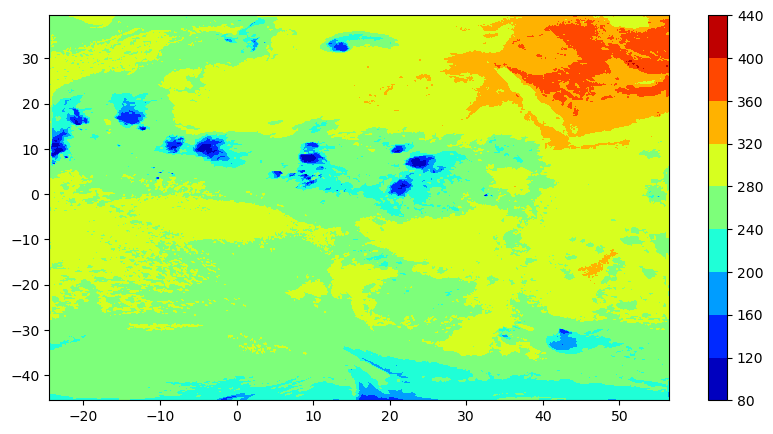

In [14]:
f = plt.figure(figsize=(10,5))
plt.contourf(olr.longitude, olr.latitude, olr['a03332'], cmap='jet')
#plt.contour(omega.longitude, omega.latitude, omega['f30208'].isel(pressure=-10), cmap='jet')
#plt.contour(storm_omega.isel(pressure=-10))
plt.colorbar()

In [15]:
storm_olr

<xarray.DataArray 'a03332' (latitude: 247, longitude: 297)>
[73359 values with dtype=float32]
Coordinates:
    time                     object 2006-08-27 06:30:00
  * latitude                 (latitude) float32 0.01725 0.05775 ... 9.94 9.98
  * longitude                (longitude) float32 18.0 18.05 ... 29.95 29.99
    forecast_period          timedelta64[ns] ...
    forecast_reference_time  object ...
Attributes:
    standard_name:    toa_outgoing_longwave_flux
    units:            W m-2
    um_stash_source:  m01s03i332
    um_runid:         aj575
    um_streamid:      apa
    um_version:       10.3
    cell_methods:     time: mean (interval: 1 hour)
    grid_mapping:     latitude_longitude

In [18]:
def calculate_relative_humidity(sh, t, p):
    """
    Calculate relative humidity (RH) from specific humidity, temperature, and pressure.

    Parameters:
    sh (float): Specific humidity in kg/kg.
    t (float): Temperature in Kelvin.
    p (float): Pressure in Pa.

    Returns:
    float: Relative humidity in percentage.
    """
    # Constants
    epsilon = 0.622  # Ratio of the molecular weight of water vapor to dry air

    # Saturation vapor pressure
    es = 611.2 * pow(10, (7.5 * (t - 273.15) / (t - 35.85)))  # Saturation vapor pressure in Pa

    # Vapor pressure
    e = sh * p / (epsilon + sh)  # Vapor pressure in Pa

    # Relative humidity
    rh = (e / es) * 100  # Relative humidity in percentage

    return rh



In [19]:
# Example usage
specific_humidity = storm_q
temperature = storm_t  # Kelvin (25°C)
pressure = storm_t.pressure  # Pa (1 atm)

relative_humidity = calculate_relative_humidity(specific_humidity, temperature, pressure)
print("Relative Humidity:", relative_humidity, "%")
relative_humidity[relative_humidity>1] = 1

Relative Humidity: <xarray.DataArray (pressure: 18, latitude: 246, longitude: 296)>
array([[[0.18601327, 0.1840423 , 0.18194705, ..., 0.27542937,
         0.2710426 , 0.26494944],
        [0.18595374, 0.18480414, 0.1842387 , ..., 0.28217918,
         0.27706948, 0.26988515],
        [0.18680526, 0.18564072, 0.1856964 , ..., 0.28886282,
         0.28340137, 0.27579543],
        ...,
        [0.35058257, 0.34954265, 0.3459915 , ..., 0.22870608,
         0.22596249, 0.22294903],
        [0.3456339 , 0.34250283, 0.33686122, ..., 0.22568728,
         0.22252306, 0.2192785 ],
        [0.33813548, 0.33283556, 0.32566142, ..., 0.22309127,
         0.21969652, 0.21632503]],

       [[0.6275979 , 0.6290601 , 0.63521844, ..., 0.4638671 ,
         0.46452746, 0.45973602],
        [0.6326093 , 0.6316026 , 0.63540053, ..., 0.47910377,
         0.4782242 , 0.4696356 ],
        [0.63659066, 0.6344512 , 0.63660145, ..., 0.49329045,
         0.48931083, 0.47740364],
...
        [0.66874444, 0.6654234 , 

IndexError: 3-dimensional boolean indexing is not supported. 

In [20]:
storm_q['rh'] = relative_humidity

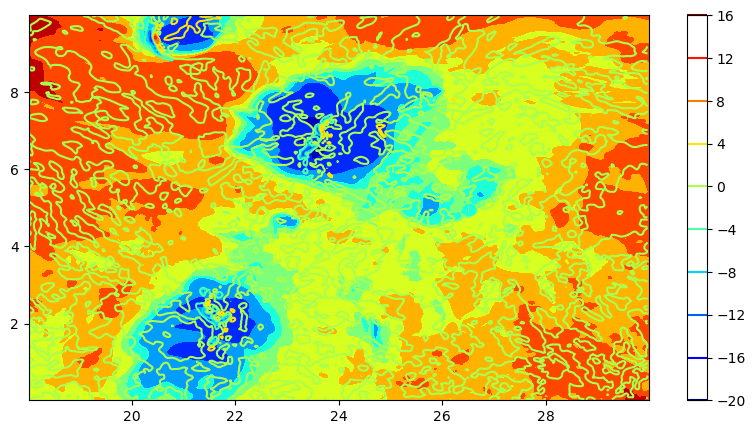

In [21]:
f = plt.figure(figsize=(10,5))
plt.contourf(storm_olr.longitude, storm_olr.latitude, storm_olr, cmap='jet')
plt.contour(storm_omega.longitude, storm_omega.latitude, storm_omega.isel(pressure=-5), cmap='jet')
#plt.contour(storm_omega.isel(pressure=-10))
plt.colorbar()

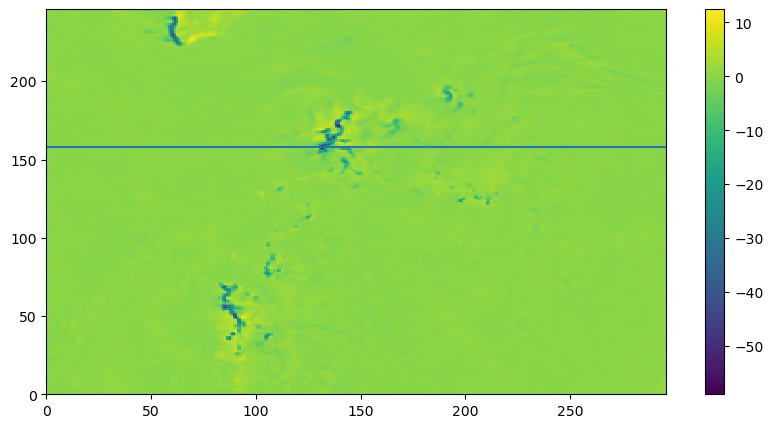

In [22]:
f = plt.figure(figsize=(10,5))
ax=f.add_subplot(111)
plt.pcolormesh(storm_omega.isel(pressure=-10))
plt.colorbar()
ax.axhline(158)

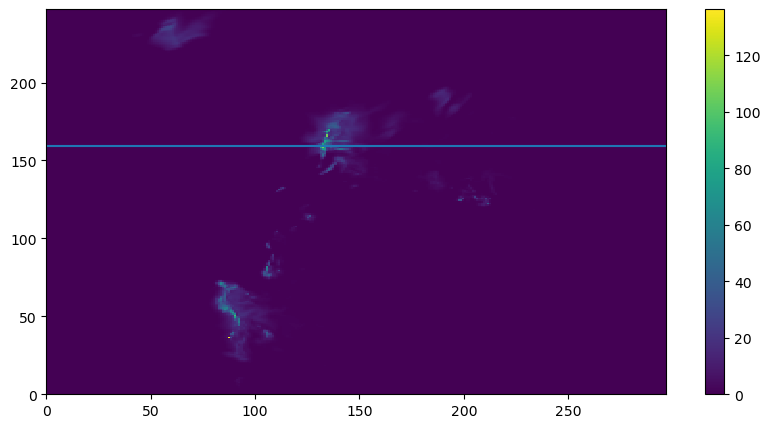

In [81]:
f = plt.figure(figsize=(10,5))
ax=f.add_subplot(111)
plt.pcolormesh(storm_rain*3600)
plt.colorbar()
ax.axhline(159)

In [89]:
latix=158 #158
line = storm_olr.isel(latitude=latix)
upline = storm_omega.isel(latitude=latix, pressure=10)
cross = storm_omega.isel(latitude=latix)
background = storm_q['rh'].isel(latitude=latix)
background.values[background>1]=1
rainp = storm_rain.isel(latitude=latix)

In [90]:
ucross = storm_u.isel(latitude=latix)

In [91]:
storm_q.pressure

<xarray.DataArray 'pressure' (pressure: 18)>
array([ 100.,  200.,  300.,  350.,  400.,  450.,  500.,  550.,  600.,  650.,
        700.,  750.,  800.,  850.,  900.,  925.,  950., 1000.], dtype=float32)
Coordinates:
    time                     object 2006-08-27 06:00:00
  * pressure                 (pressure) float32 100.0 200.0 ... 950.0 1e+03
    forecast_period          timedelta64[ns] 956 days 06:00:00
    forecast_reference_time  object 2004-01-01 00:00:00
Attributes:
    axis:       Z
    units:      hPa
    long_name:  pressure

In [92]:
st=1
sarrow = 0

lowres= 5

xquiv = ucross.longitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

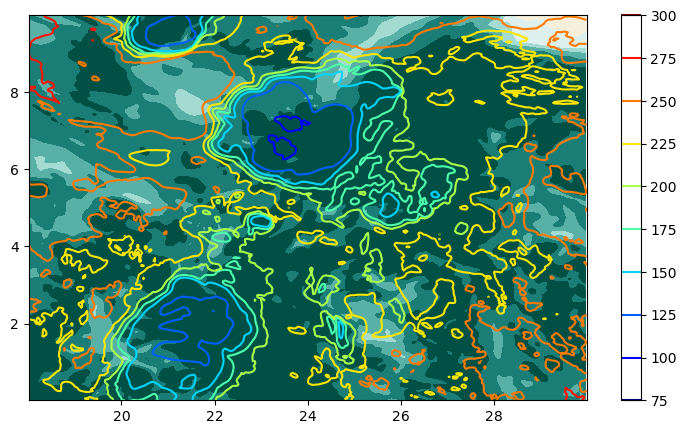

In [93]:
f = plt.figure(figsize=(9,5))
plt.contourf(storm_q.longitude, storm_q.latitude, storm_q['rh'].sel(pressure=600)*100, levels=np.arange(0,101,10), cmap='BrBG')
plt.contour(storm_olr.longitude, storm_olr.latitude, storm_olr, cmap='jet')
plt.colorbar()

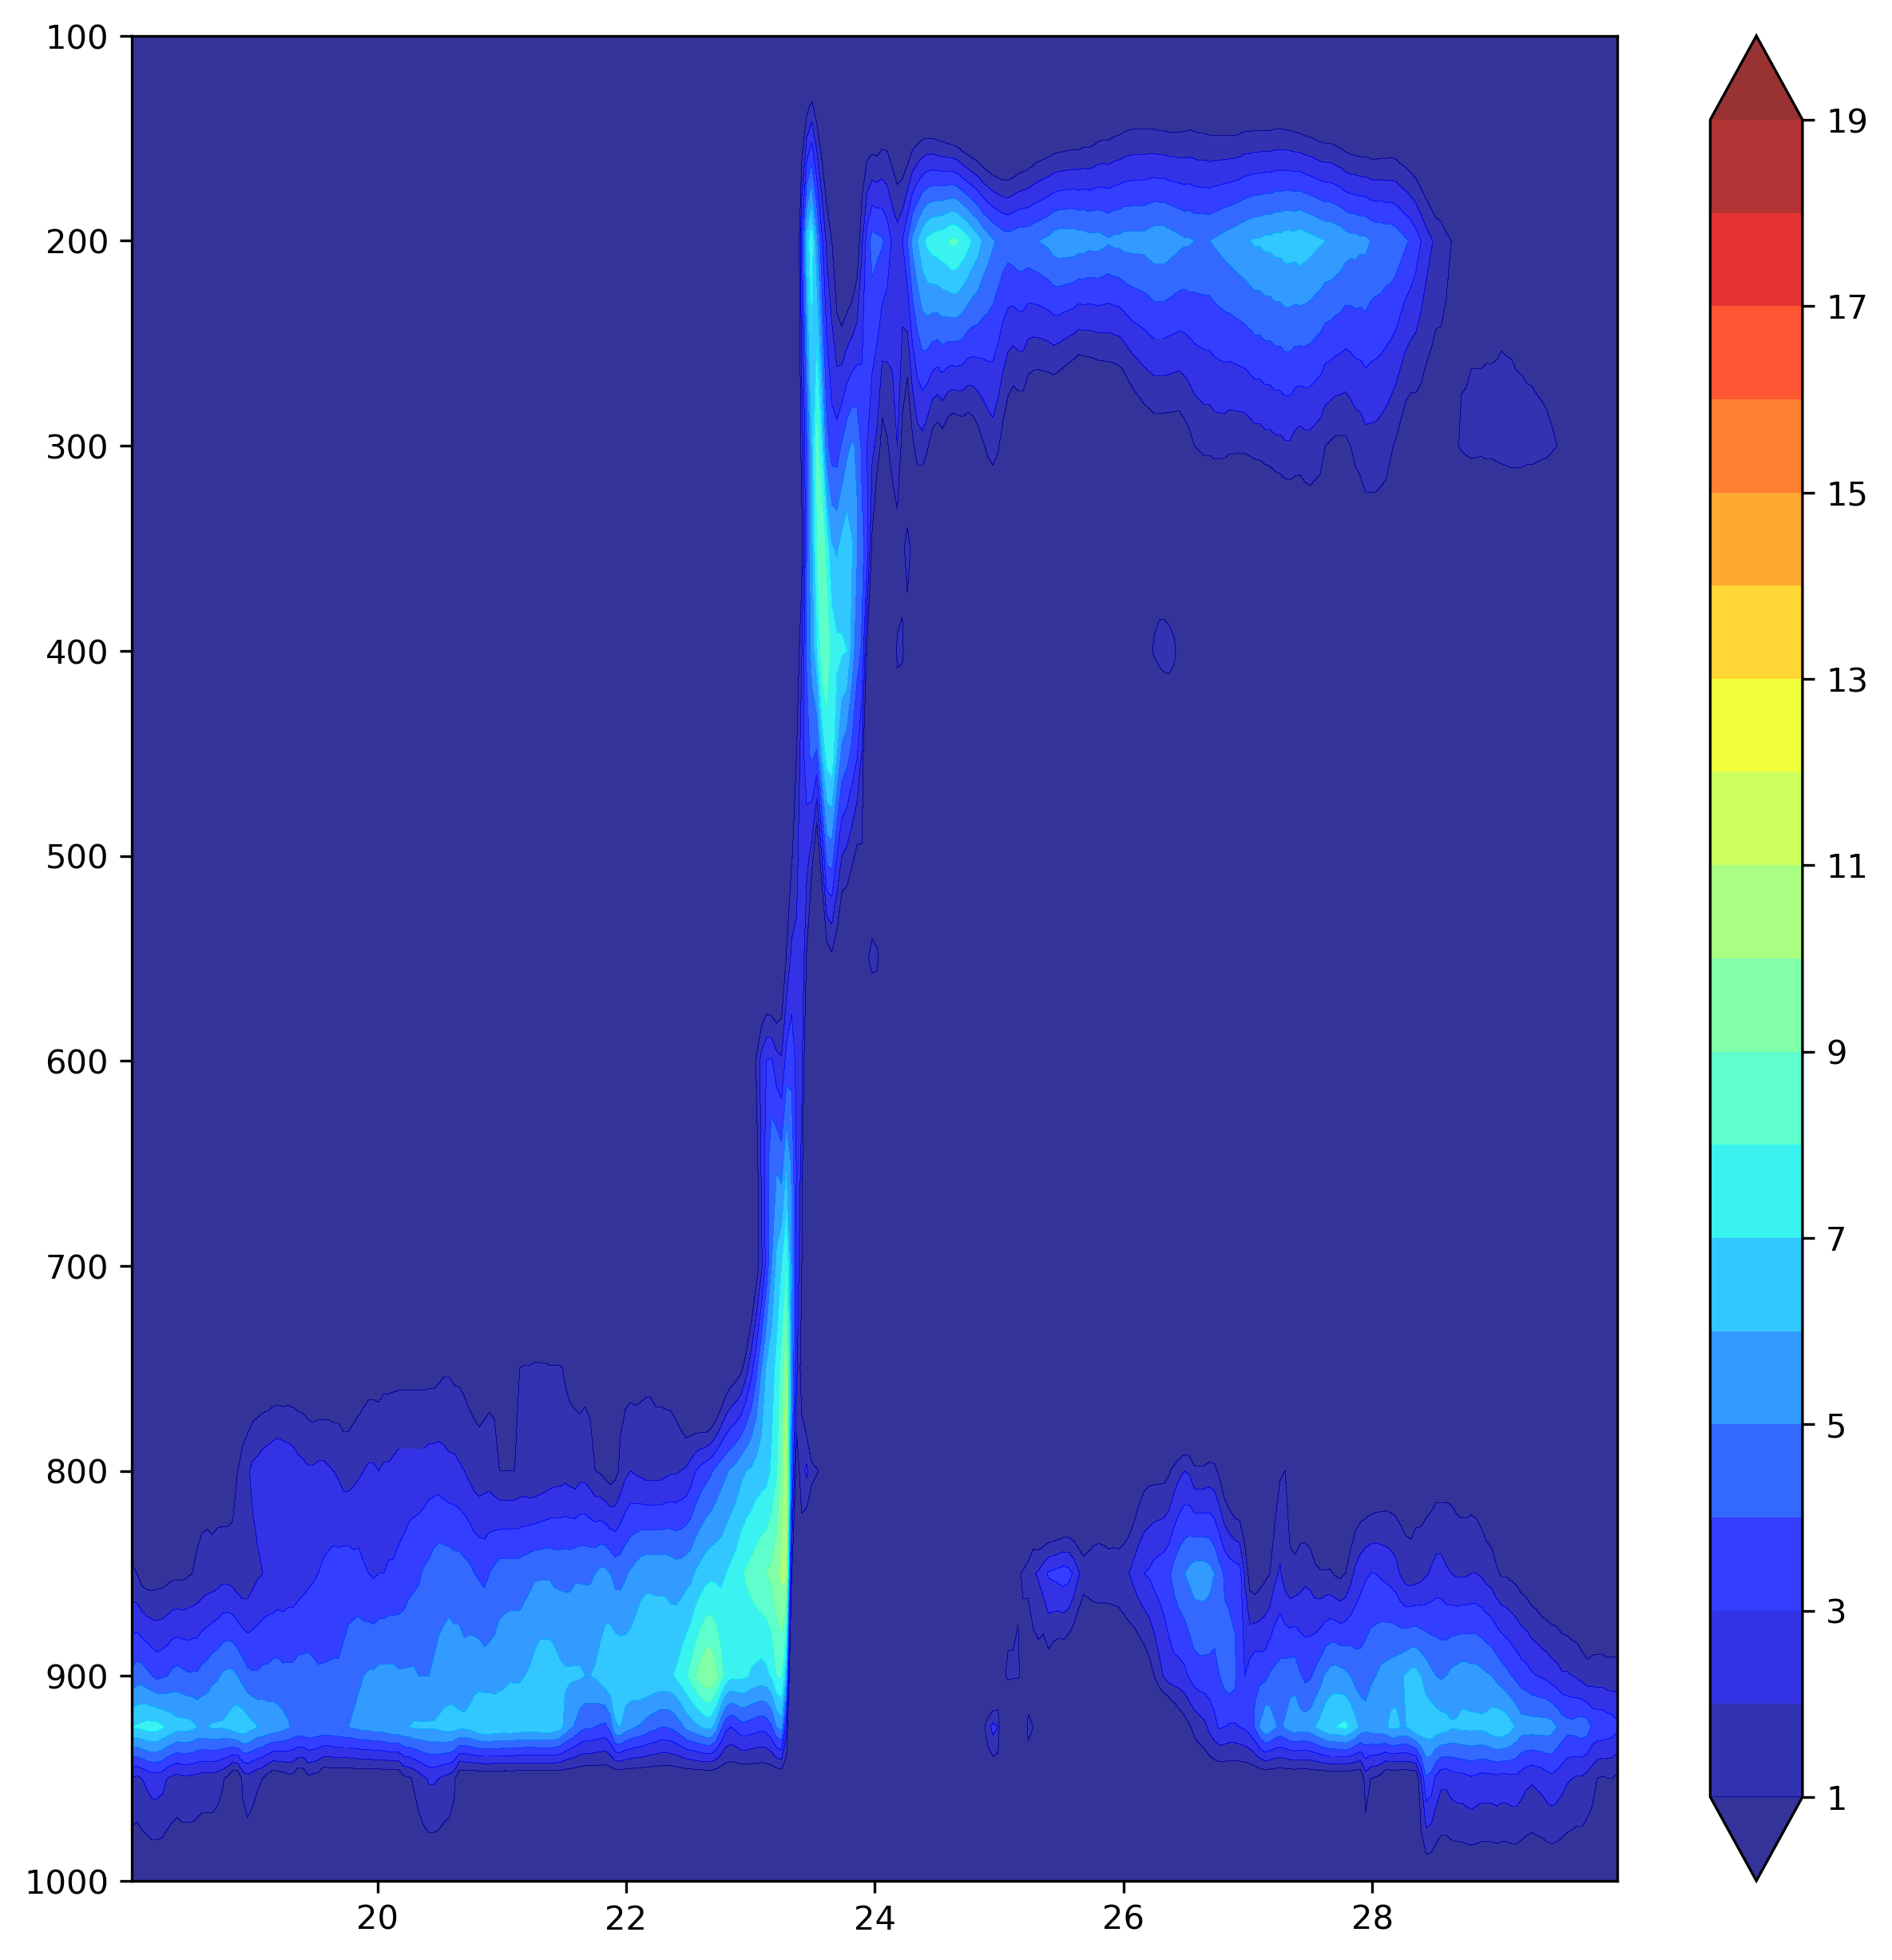

In [181]:
f = plt.figure(figsize=(10,10), dpi=300)
ax = f.add_subplot(111)
plt.gca().invert_yaxis()
mp=ax.contourf(cross.longitude, cross.pressure, ucross , cmap='jet', alpha=0.8, levels=np.arange(1,20,1), extend='both') #np.sqrt(ucross**2+cross**2)
plt.colorbar(mp)#levels=np.linspace(-70,5,50), 

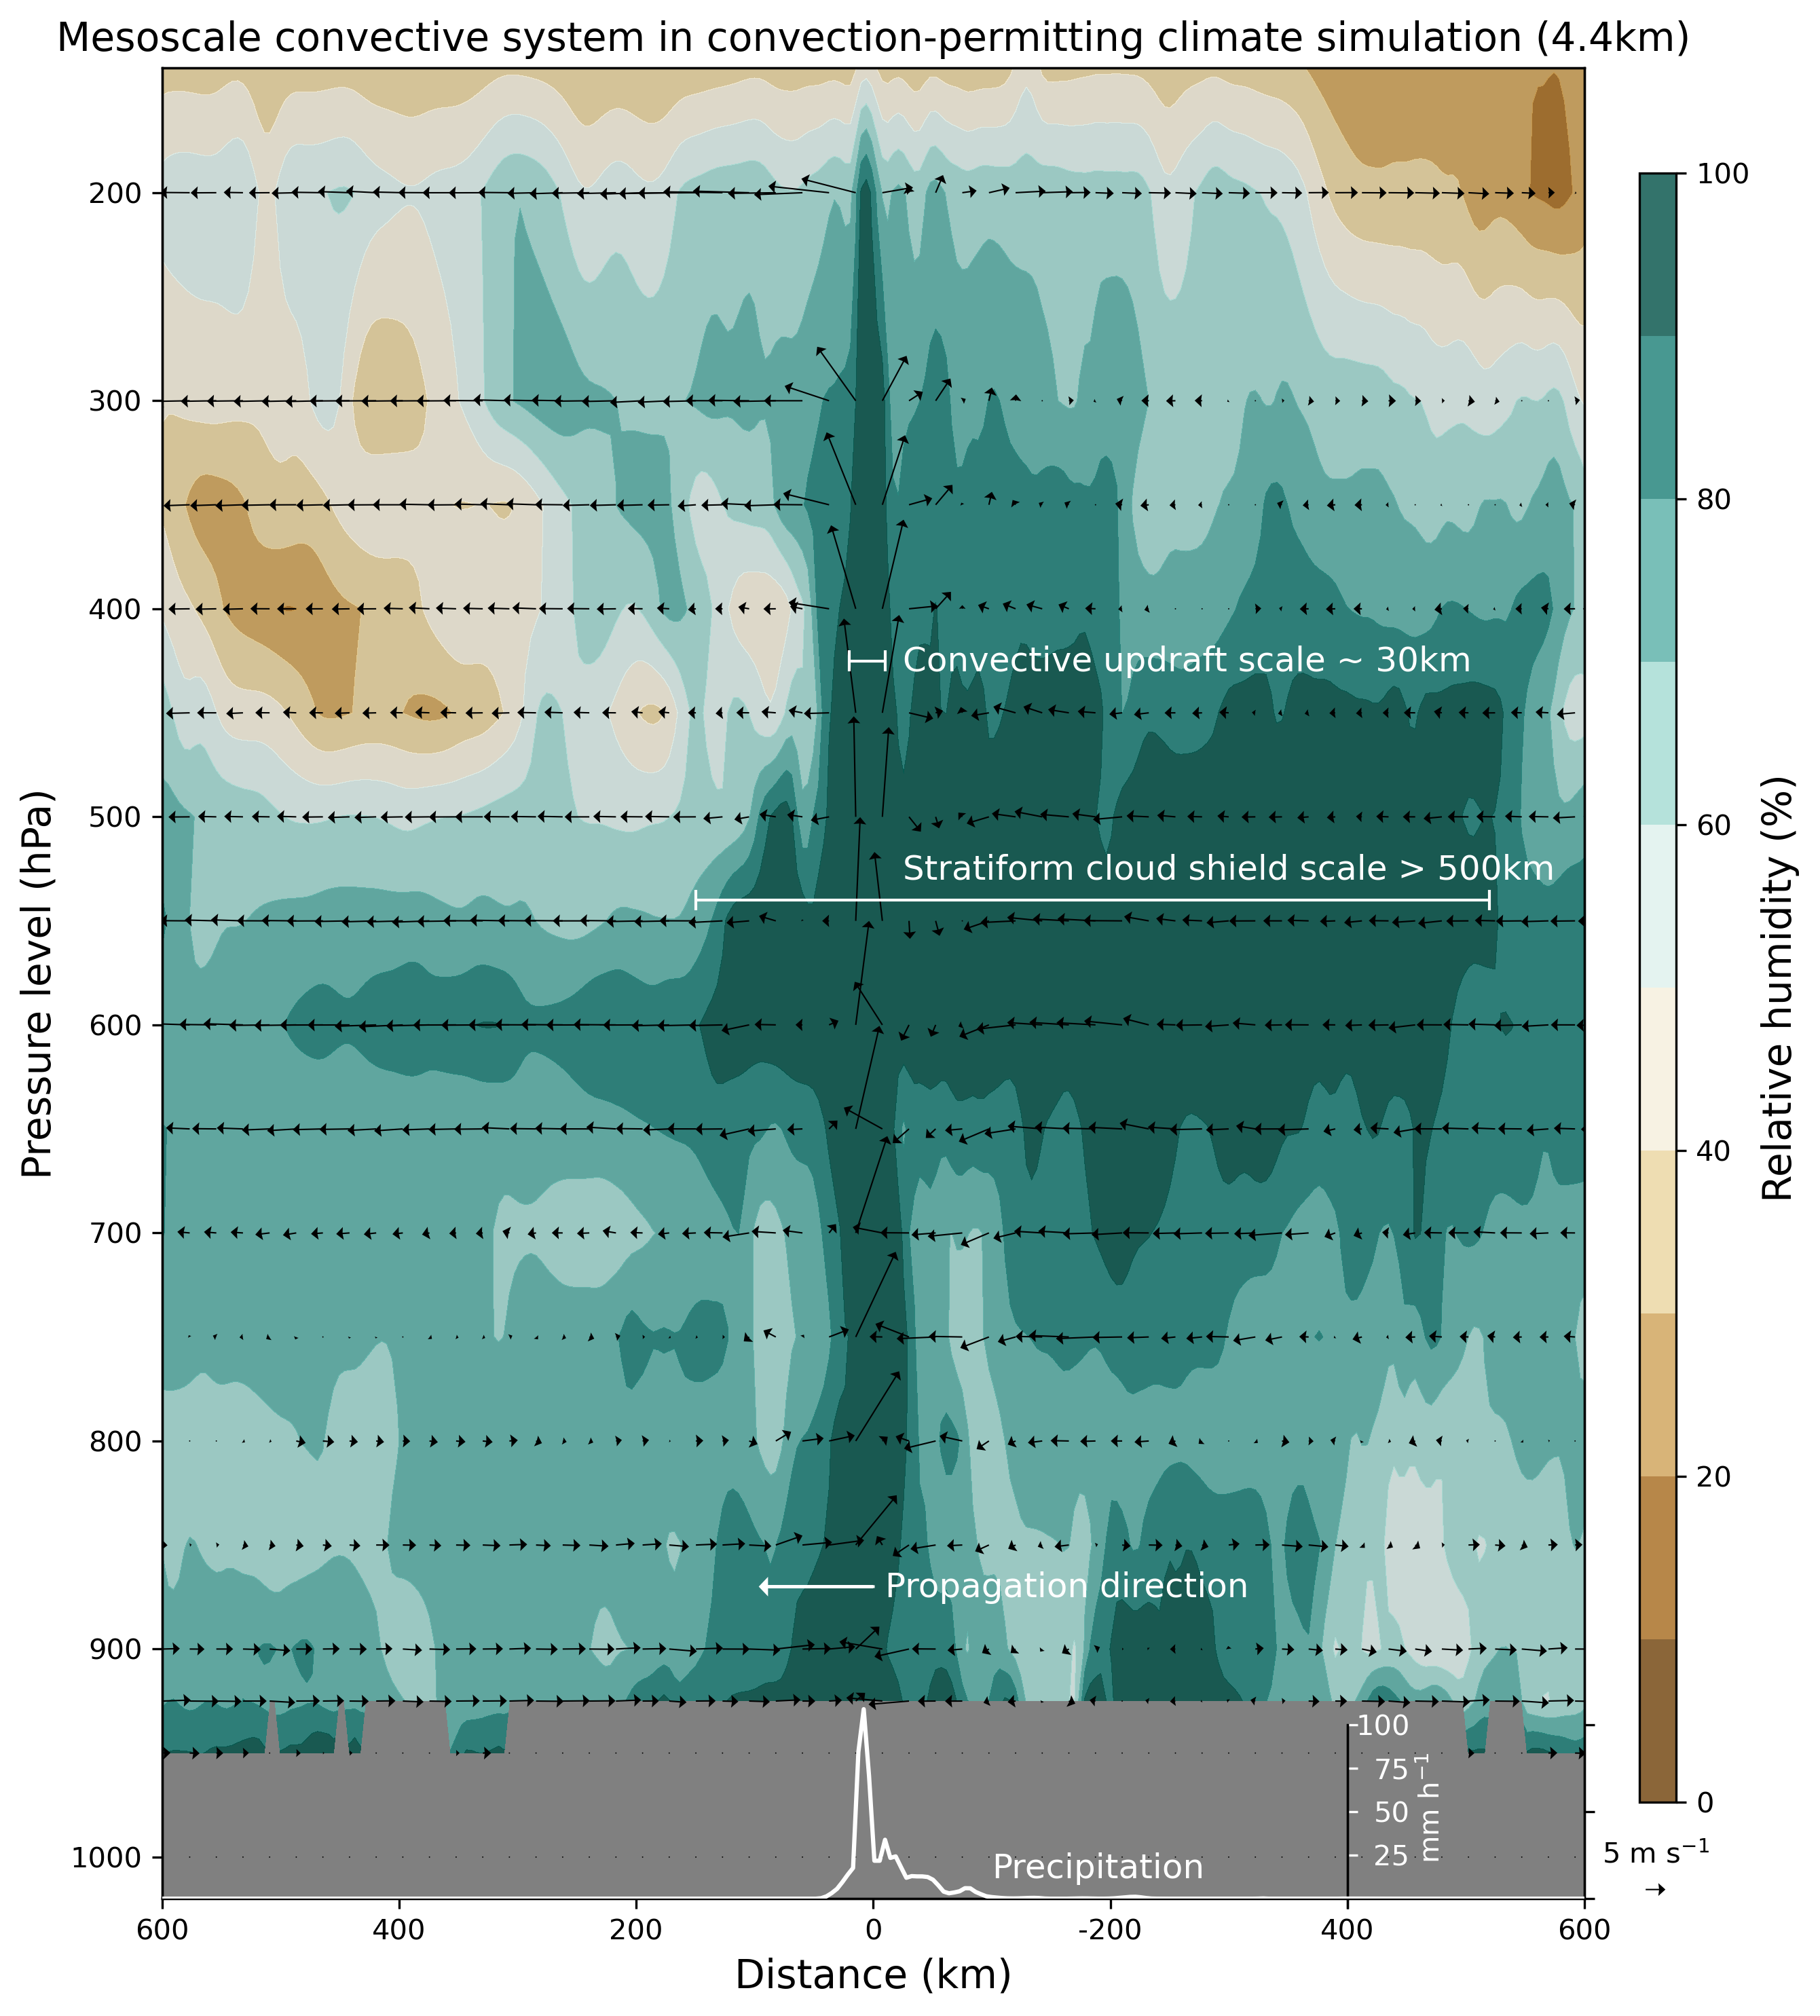

In [182]:
f = plt.figure(figsize=(9,10), dpi=300)
ax = f.add_subplot(111)

mp=ax.contourf(cross.longitude*111-2600, cross.pressure, (background.where(background>0)*100), cmap='BrBG',levels=np.arange(0,101,10), alpha=0.8) #levels=np.linspace(-70,5,50), 
#plt.contour(cross.longitude, cross.pressure, background*100, colors='grey', linewidths=0.5,levels=np.arange(0,101,10), extend='both')
#cbar = plt.colorbar(mp, label='Relative humidity (%)')
plt.gca().invert_yaxis()

qv = ax.quiver(xquiv*111-2600, yquiv, uu, vv*-1, scale=360, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')

ax1 = ax.twinx()
ax1.plot(rainp.longitude*111-2600, rainp*3600, color='w', zorder=99, linestyle='solid', linewidth=1.5)

ax.set_facecolor('grey')
ax.set_xticks([-600,-400,-200,0,200,400,600])
ax.set_xticklabels([600,400,200,0,-200,400,600])

ax.arrow(0, 870, -90, 0, head_width=6, head_length=5, fc='w', ec='w')
ax.text(10, 875, 'Propagation direction', color='w', fontsize=12)#, rotation=45, rotation_mode='anchor', transform_rotates_text=True)

ax.set_xlim(-600,600)
ax.set_ylim(1020,140)
#plt.yscale("log") 
ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)

#ax1.set_ylabel(r'Precipitation (mm h$^{-1}$)', fontsize=14)
ax1.set_ylim(0,1053)
ax1.set_yticks(np.arange(0,120,50))
ax1.set_yticklabels(['','',''])

axin1 = ax1.inset_axes(
        [400, 0, 0, 100], transform=ax1.transData)

axin1.set_yticks([0.25,0.5,0.75,1])
axin1.tick_params(axis="y",direction="in", pad=-22)
#axin1.set_ylabel(r'mm h$^{-1}$', fontsize=12)
axin1.set_yticklabels(['25','50','75','100'])
axin1.set_xticks([0])
axin1.set_xticklabels([''])

axin1.yaxis.label.set_color('white')
axin1.tick_params(axis='y', colors='white')
ax.text(100,1010,'Precipitation', color='white', fontsize=12)
ax.text(460,1000,r'mm h$^{-1}$', color='white', fontsize=10, rotation=90)


ax.set_xticks([-600,-400,-200,0,200,400,600])
ax.set_xticklabels([600,400,200,0,-200,400,600])



ax.hlines(425, -20, 10, color='w', linewidth=1)
ax.vlines(-20, 420, 430, color='w', linewidth=1)
ax.vlines(10, 420, 430, color='w', linewidth=1)
ax.text(25,430, 'Convective updraft scale ~ 30km', color='white', fontsize=12)

ax.hlines(540, -150, 520, color='w', linewidth=1)
ax.vlines(-150, 535, 545, color='w', linewidth=1)
ax.vlines(520, 535, 545, color='w', linewidth=1)
ax.text(25,530, 'Stratiform cloud shield scale > 500km', color='white', fontsize=12)


#ax.axhline(1013, linestyle='solid', color='k', linewidth=2)


plt.title('Mesoscale convective system in convection-permitting climate simulation (4.4km)', fontsize=14)
# cbar.label('Relative humidity (%)')

plt.tight_layout()

f.subplots_adjust(right=0.87)
cax = f.add_axes([0.9, 0.11, 0.02, 0.8])
cbar = f.colorbar(mp, cax)
cbar.set_label('Relative humidity (%)', fontsize=14)

f.savefig('mcs_crosssec.png')